In [1]:
require 'paths'
require 'image'
require 'nn'
display_image = itorch.image

# Set up main derivers #

- img_dim - dimentions of the net input

In [2]:
img_dim = 256

# Setting up paths #

We will use 2 paths. One for the location of the images - CACD200 and another one of descriptors

In [3]:
cacd_path = '/Users/aponamaryov/Downloads/CACD2000'
descriptor_path = '/Users/aponamaryov/Github/wrn/Results'
print('cacd path exists: ', paths.dirp(cacd_path))
print('descriptor path exists: ', paths.dirp(descriptor_path))

cacd path exists: 	true	
descriptor path exists: 	true	


# 1. Load net and descriptors #
- load the network
- add softmax to classify the logits
- make sure that you convert softmax into float()
- turn the net into evaluate mode
- printout the structure of descriptors and the net

In [10]:
net = torch.load(paths.concat(descriptor_path, 'wrn27.t7'))
net:add(nn.SoftMax())
net = net:float()
net:training()
print({net})
train_desc = torch.load(paths.concat(descriptor_path, 'cacd_train.t7'))
val_desc = torch.load(paths.concat(descriptor_path, 'cacd_val.t7'))
print('train_desc:')
for i, c in pairs(train_desc) do
    if type(c) == 'table' then
        print(i .. ":", #c)
    else
        print(i .. ":")
    end
end
print('')
print('val_desc:')
for i, c in pairs(train_desc) do
    if type(c) == 'table' then
        print(i .. ":", #c)
    else
        print(i .. ":")
    end
end

{
  1 : 


    nn.Sequential {
      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> output]
      (1): nn.SpatialConvolution(3 -> 8, 3x3, 1,1, 1,1) without bias
      (2): nn.Sequential {
        [input -> (1) -> (2) -> output]
        (1): nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> output]
          (1): nn.ReLU
          (2): nn.SpatialBatchNormalization (4D) (8)
          (3): nn.ConcatTable {
            input
              |`-> (1): nn.Sequential {
              |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> output]
              |      (1): nn.SpatialConvolution(8 -> 16, 3x3, 1,1, 1,1) without bias
              |      (2): nn.ReLU
              |      (3): nn.SpatialBatchNormalization (4D) (16)
              |      (4): nn.Dropout(0.500000)
              |      (5): nn.SpatialConvolution(16 -> 16, 3x3, 1,1, 1,1) without bias
              |    }
               `-> (2): nn.SpatialConvolution(

3) -> (4) -> (5) -> output]
              |      (1): nn.SpatialConvolution(32 -> 64, 3x3, 2,2, 1,1) without bias
              |      (2): nn.ReLU
              |      (3): nn.SpatialBatchNormalization (4D) (64)
              |      (4): nn.Dropout(0.500000)
              |      (5): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1) without bias
              |    }
               `-> (2): nn.SpatialConvolution(32 -> 64, 1x1, 2,2) without bias
               ... -> output
          }
          (4): nn.CAddTable
        }
        (2): nn.Sequential {
          [input -> (1) -> (2) -> output]
          (1): nn.ConcatTable {
            input
              |`-> (1): nn.Sequential {
              |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
              |      (1): nn.ReLU
              |      (2): nn.SpatialBatchNormalization (4D) (64)
              |      (3): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1) without bias
              |      (4): nn.ReLU
       

ential {
              |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
              |      (1): nn.ReLU
              |      (2): nn.SpatialBatchNormalization (4D) (256)
              |      (3): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1) without bias
              |      (4): nn.ReLU
              |      (5): nn.SpatialBatchNormalization (4D) (256)
              |      (6): nn.Dropout(0.500000)
              |      (7): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1) without bias
              |    }
               `-> (2): nn.Identity
               ... -> output
          }
          (2): nn.CAddTable
        }
      }
      (10): nn.ReLU
      (11): nn.SpatialBatchNormalization (4D) (256)
      (12): nn.SpatialAveragePooling(2x2, 2,2)
      (13): nn.View(4096)
      (14): nn.Linear(4096 -> 1997)
      (15): nn.SoftMax
    }
    {
      _type : torch.FloatTensor
      modules : 
        {
          1 : 
            nn.SpatialConvolution(3 -> 8, 3x3,

  }
            {
              _type : torch.FloatTensor
              output : FloatTensor - empty
              gradInput : FloatTensor - empty
              modules : 
                {
                  1 : nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.ReLU
  (2): nn.SpatialBatchNormalization (4D) (8)
  (3): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> output]
      |      (1): nn.SpatialConvolution(8 -> 16, 3x3, 1,1, 1,1) without bias
      |      (2): nn.ReLU
      |      (3): nn.SpatialBatchNormalization (4D) (16)
      |      (4): nn.Dropout(0.500000)
      |      (5): nn.SpatialConvolution(16 -> 16, 3x3, 1,1, 1,1) without bias
      |    }
       `-> (2): nn.SpatialConvolution(8 -> 16, 1x1) without bias
       ... -> output
  }
  (4): nn.CAddTable
}
                  2 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Seque

     |      (2): nn.ReLU
      |      (3): nn.SpatialBatchNormalization (4D) (32)
      |      (4): nn.Dropout(0.500000)
      |      (5): nn.SpatialConvolution(32 -> 32, 3x3, 1,1, 1,1) without bias
      |    }
       `-> (2): nn.SpatialConvolution(16 -> 32, 1x1, 2,2) without bias
       ... -> output
  }
  (4): nn.CAddTable
}
                  2 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
      |      (1): nn.ReLU
      |      (2): nn.SpatialBatchNormalization (4D) (32)
      |      (3): nn.SpatialConvolution(32 -> 32, 3x3, 1,1, 1,1) without bias
      |      (4): nn.ReLU
      |      (5): nn.SpatialBatchNormalization (4D) (32)
      |      (6): nn.Dropout(0.500000)
      |      (7): nn.SpatialConvolution(32 -> 32, 3x3, 1,1, 1,1) without bias
      |    }
       `-> (2): nn.Identity
       ... -> output
  }
  (2): nn.CAddTable
}
   

   |      (2): nn.SpatialBatchNormalization (4D) (64)
                    |      (3): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1) without bias
                    |      (4): nn.ReLU
                    |      (5): nn.SpatialBatchNormalization (4D) (64)
                    |      (6): nn.Dropout(0.500000)
                    |      (7): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1) without bias
                    |    }
                     `-> (2): nn.Identity
                     ... -> output
                }
                (2): nn.CAddTable
              }
            }
            {
              _type : torch.FloatTensor
              output : FloatTensor - empty
              gradInput : FloatTensor - empty
              modules : 
                {
                  1 : nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.ReLU
  (2): nn.SpatialBatchNormalization (4D) (32)
  (3): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      

           (2): nn.CAddTable
              }
            }
            {
              _type : torch.FloatTensor
              output : FloatTensor - empty
              gradInput : FloatTensor - empty
              modules : 
                {
                  1 : nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.ReLU
  (2): nn.SpatialBatchNormalization (4D) (64)
  (3): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> output]
      |      (1): nn.SpatialConvolution(64 -> 128, 3x3, 2,2, 1,1) without bias
      |      (2): nn.ReLU
      |      (3): nn.SpatialBatchNormalization (4D) (128)
      |      (4): nn.Dropout(0.500000)
      |      (5): nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1) without bias
      |    }
       `-> (2): nn.SpatialConvolution(64 -> 128, 1x1, 2,2) without bias
       ... -> output
  }
  (4): nn.CAddTable
}
                  2 : nn.Sequential {
  [input -> (1) -> (2) -

> output]
      |      (1): nn.SpatialConvolution(128 -> 256, 3x3, 2,2, 1,1) without bias
      |      (2): nn.ReLU
      |      (3): nn.SpatialBatchNormalization (4D) (256)
      |      (4): nn.Dropout(0.500000)
      |      (5): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1) without bias
      |    }
       `-> (2): nn.SpatialConvolution(128 -> 256, 1x1, 2,2) without bias
       ... -> output
  }
  (4): nn.CAddTable
}
                  2 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
      |      (1): nn.ReLU
      |      (2): nn.SpatialBatchNormalization (4D) (256)
      |      (3): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1) without bias
      |      (4): nn.ReLU
      |      (5): nn.SpatialBatchNormalization (4D) (256)
      |      (6): nn.Dropout(0.500000)
      |      (7): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1) wi

train_desc:	
file_name:	155458	
age:	155458	
classes:	1997	
size:	
identity_id:	155458	
num_classes:	


	
val_desc:	
file_name:	155458	
age:	155458	
classes:	1997	
size:	
identity_id:	155458	
num_classes:	


# 2. Create supporting functions

- load_img_from_desc(desc, path, index) - takes a descriptor, path to where the images are stored, and an index of the image. The output of the function is an image that will be displayed before the image is returned.
- provide_top5_predictions(img, net) - takes a forward pass of the img through the net and returns sorted top5 results

In [11]:
function load_img(path, img_name)
    local path = paths.concat(path, img_name)
    assert(paths.filep(path), "Error: File doesn't exit at path: " .. path)
    local img = image.load(path)
    img = image.scale(img, img_dim, img_dim):squeeze()
    display_image(img)
    img = torch.view(img, 1, 3, img_dim, img_dim)
    return img:float()
end
--
function load_img_from_desc(desc, path, index)
    local img_name = desc.file_name[index]
    local age = desc.age[index]
    local identity_id = desc.identity_id[index]
    local img_class = desc.classes[identity_id]
    print("img_name: " .. img_name .. ", name: " .. img_class .. ", age: " .. age .. ", id: " .. identity_id)
    return load_img(path, img_name), identity_id, img_class, age
end
--
function provide_top5_predictions(img, _net, desc)
    local topX = 5
    local output = _net:forward(img):squeeze()
    local prob, id = torch.sort(output, 1, true)
    id = id[{{1, topX}}]
    prob = prob[{{1, topX}}]
    print("Top5:")
    local names = {}
    for i =1, id:size(1) do
        local name = desc.classes[id[i]]
        print(id[i], prob[i], name)
        names[i] = name
    end
    return id, prob, names
end

## Launch the classification ##

- load image
- run top 5 prediction

img_name: 23_Emilia_Clarke_0011.jpg, name: Emilia_Clarke, age: 23, id: 162	


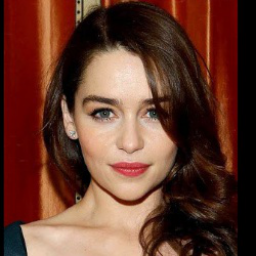

Top5:	
1592	0.98309290409088	Simon_Cowell	
995	0.0024034744128585	Sandra_Oh	
1202	0.0014608649071306	Alexis_Denisof	
1685	0.0014284402132034	Ray_Romano	
1304	0.0012515094131231	Christopher_Eccleston	


In [14]:
local descriptor_used = train_desc
anchor_img, ground_trueth_id, ground_trueth_class, train_age = load_img_from_desc(descriptor_used, cacd_path, 12411)
predicted_id, prediction_prob, predicted_names = provide_top5_predictions(anchor_img, net, descriptor_used)

# 3. Let's try to run our picture #

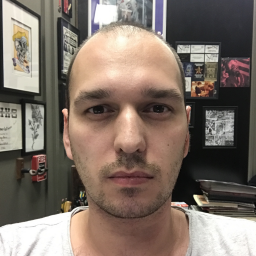

Top5:	
1739	0.21839709579945	Stephanie_Zimbalist	
1023	0.16785921156406	Leah_Remini	
1191	0.1371488571167	Rufus_Sewell	
1748	0.081140294671059	Bill_Condon	
1371	0.024179184809327	James_Denton	


In [243]:
local file_name = '34_Alex_Ponamarev_0001.jpg'
local path = '/Users/aponamaryov/Downloads'
local anchor_img = load_img(path, file_name)
local predicted_id, prediction_prob, predicted_names = provide_top5_predictions(anchor_img, net, train_desc)